In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits import mplot3d
import pandas as pd
import math
from os import listdir
from os.path import isfile, join
import os
import itertools
import random
import networkx as nx
import pickle

In [2]:
#Read and storage data

#Read the index dictionary
#Revert the index 

DataFolder = '/home/samuel/Documents/PhD/Quasispecies/Data/'

index_name = 'seqs_index.dict'

index_dict = {}

with open(DataFolder+index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])
        
print('Loaded index_dict')
WD = os.getcwd()
mypath = DataFolder + 'Sequences_filtered/'

#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}

#Interpret file name, and extract step number from it

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        print(f'step={step} for t={t}')
    
    file_name = mypath + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab

Loaded index_dict
step=36 for t=30
step=28 for t=30
step=34 for t=43
step=46 for t=43
step=58 for t=30
step=22 for t=30
step=16 for t=43
step=40 for t=30
step=42 for t=43
step=18 for t=30
step=12 for t=43
step=44 for t=30
step=40 for t=43
step=44 for t=43
step=58 for t=43
step=22 for t=43
step=4 for t=30
step=38 for t=30
step=56 for t=43
step=12 for t=30
step=42 for t=30
step=30 for t=30
step=34 for t=30
step=14 for t=43
step=38 for t=43
step=30 for t=43
step=32 for t=43
step=60 for t=43
step=16 for t=30
step=14 for t=30
step=26 for t=30
step=26 for t=43
step=46 for t=30
step=50 for t=43
step=48 for t=43
step=10 for t=43
step=6 for t=30
step=54 for t=30
step=8 for t=43
step=2 for t=43
step=2 for t=30
step=54 for t=43
step=4 for t=43
step=52 for t=30
step=52 for t=43
step=56 for t=30
step=48 for t=30
step=1 for t=43
step=20 for t=43
step=20 for t=30
step=32 for t=30
step=28 for t=43
step=36 for t=43
step=6 for t=43
step=50 for t=30
step=60 for t=30
step=10 for t=30
step=25 for t=30
step

In [3]:
temps = [30, 43]

df = {'': {'': {}, 'norm-euc': {}, 'norm-1': {}},
      'log': {'': {}, 'norm-euc': {}, 'norm-1': {}}}
        

#Upload data to DataFrame
for t in temps:

    df[''][''][t] = pd.DataFrame([])
    df[''][''][t] = pd.DataFrame.from_dict(data_dict[t])
    df[''][''][t] = df[''][''][t].fillna(0)
    
    #Create log unnormalized
    df_t = df[''][''][t]
    df_2 = df_t + 1
    df['log'][''][t] = df_2.apply('log')
    
    
    #Sort columns of abundance and log
    L = list(df_t.columns)
    L.sort()
    
    #Create empty containers
    for k_1 in df.keys():
        for k_2 in ['norm-euc', 'norm-1']:
            df[k_1][k_2][t] = pd.DataFrame([])
            df[k_1][k_2][t].index = df_t.index
    
    for x in L:
        for k_1 in df.keys():
            arr = np.array(df[k_1][''][t][x].tolist())
            normalized_arr = arr / np.sqrt(np.sum(arr**2))
            relative_arr = arr / np.sum(arr)
            df[k_1]['norm-euc'][t] = normalized_arr
            df[k_1]['norm-1'][t] = normalized_arr


In [4]:
df = {}
#Upload data to DataFrame
df[43] = pd.DataFrame([])
df[30] = pd.DataFrame([])
df[43] = pd.DataFrame.from_dict(data_dict[43])
df[30] = pd.DataFrame.from_dict(data_dict[30])
df[43] = df[43].fillna(0)
df[30] = df[30].fillna(0)


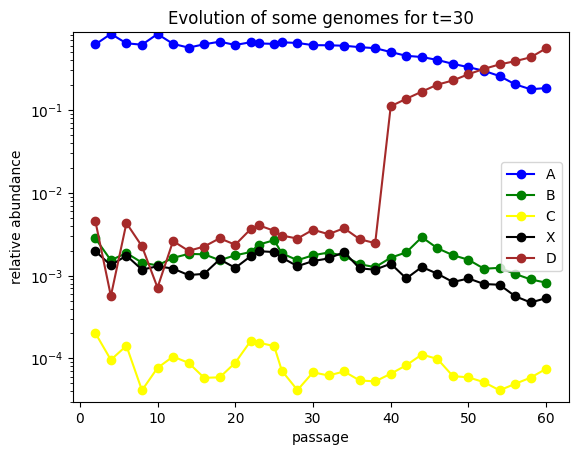

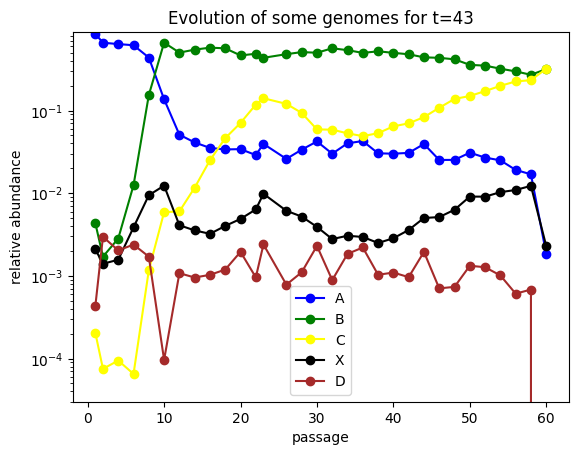

In [5]:
for t in temps:
    plt.figure()
    df_t = df[t]
    df_t = df_t.reindex(sorted(df_t.columns), axis=1)
    L = df_t.columns

    k_list = [2,0,1,12, 22]
    k_letter = {0:'B', 1:'C', 2:'A', 12:'X', 22:'D'}
    c_k = {2:'blue', 1:'yellow', 0:'green', 12:'black', 22:'brown'}
    for i in k_list:

        for col in L:
            df_t[col] = df_t[col]/df_t[col].sum()
        sample = df_t.loc[i]

        x = np.array(sample.index.tolist())
        y = np.array(sample.tolist())


        plt.plot(x,y, 'o-', label=f"{k_letter[i]}", c=c_k[i])
    plt.ylim(bottom=3*10**-5)
    plt.yscale('log')
    plt.xlabel('passage')
    plt.ylabel('relative abundance')
    plt.legend(loc='best')
    plt.title(f'Evolution of some genomes for t={t}')
    plt.savefig(f'/home/samuel/Documents/PhD/Quasispecies/Quasispecies_evolution/01-overlapping_vector/pics_results/abundance_evolution_{t}.svg', dpi=300, format='svg')

In [6]:
df_t.sort_index().head(13)

,1,2,4,6,8,10,12,14,16,18,...,42,44,46,48,50,52,54,56,58,60
0,0.004350,0.001708,0.002829,0.012501,0.153984,0.663883,0.502899,0.546071,0.577330,0.566719,...,0.480104,0.440774,0.434795,0.417203,0.357461,0.349797,0.321184,0.297978,0.271053,0.317715
1,0.000205,0.000075,0.000095,0.000065,0.001171,0.005908,0.006020,0.011685,0.025044,0.046396,...,0.070080,0.083303,0.108113,0.138366,0.150015,0.172153,0.199218,0.225247,0.233388,0.321295
2,0.847570,0.662261,0.638155,0.617303,0.438278,0.137061,0.051060,0.041150,0.035350,0.033875,...,0.030771,0.039388,0.025265,0.025321,0.030951,0.026997,0.024990,0.019144,0.016941,0.001845
3,0.000000,0.000036,0.000066,0.000219,0.002900,0.000231,0.009701,0.010615,0.011803,0.011431,...,0.010086,0.009470,0.008783,0.008632,0.007240,0.007348,0.006871,0.006172,0.005638,0.000471
4,0.000000,0.000032,0.000066,0.000272,0.002738,0.000000,0.009040,0.010005,0.010707,0.010571,...,0.008885,0.008441,0.007993,0.007667,0.006704,0.006480,0.006013,0.005550,0.005023,0.000000
5,0.000023,0.000051,0.000100,0.000262,0.004242,0.001446,0.017592,0.016421,0.012384,0.011387,...,0.010021,0.007727,0.009663,0.007979,0.007336,0.006636,0.005759,0.005323,0.006141,0.000440
6,0.000039,0.000062,0.000064,0.000224,0.003457,0.006581,0.014053,0.012749,0.009704,0.008741,...,0.007812,0.006347,0.007664,0.006195,0.006004,0.005020,0.004559,0.004298,0.004874,0.002454
7,0.000007,0.000009,0.000000,0.000014,0.000090,0.000399,0.000284,0.000467,0.000614,0.000654,...,0.012971,0.014208,0.017797,0.019537,0.021384,0.020485,0.016335,0.014896,0.013725,0.012996
8,0.000575,0.000062,0.000059,0.000123,0.002163,0.004134,0.008724,0.008126,0.006283,0.005617,...,0.005849,0.005608,0.007022,0.007437,0.007615,0.008124,0.009479,0.010449,0.014073,0.019527
9,0.000007,0.000028,0.000051,0.000159,0.002067,0.000523,0.009807,0.008559,0.006082,0.005072,...,0.005008,0.004236,0.004364,0.004076,0.003783,0.002867,0.002687,0.002601,0.002937,0.000209


In [7]:
seqs_list = list(index_dict.keys())

In [8]:
# We want to know which haplotypes were the most frequent in every temperature
t = 43

df_t = df[t] 
L = df_t.columns

for col in L:
    df_t[col] = df_t[col]/df_t[col].sum()

df_t_sum = df_t.sum(axis=1)

df_t_sum = df_t_sum.sort_values(ascending=False)

ind = df_t_sum.index.tolist()[:20]
ab = df_t_sum.tolist()[:20]

print(ind)
print(ab)

[0, 2, 1, 5, 3, 7, 4, 6, 8, 12, 9, 11, 1654, 10, 28, 13, 14, 46, 33, 30]
[12.225489655456887, 4.121854153048877, 2.6800804562211686, 0.23719944420604316, 0.23099231205799087, 0.21392371827394163, 0.20925728448922912, 0.19368560572242988, 0.19098322888253325, 0.17021024040459404, 0.11536745940420406, 0.11377684893388255, 0.10489291727461722, 0.08774309674781551, 0.07962365148250775, 0.07420617201878374, 0.0718671652979912, 0.06867067885775703, 0.06763545758989563, 0.06637861761751962]


In [9]:
b = seqs_list[0]
c = seqs_list[1]
a = seqs_list[2]
x = seqs_list[12]
d = seqs_list[22]

In [10]:
print(x)

CAACAAGGTCAGCTATATCATAATATCGGTATTGTAGACGGCTTTGACAGACGTGACATCCGGCTCAAATCTTTCACCATAAAAGGTGAACGAAATGGGCGGCCTGTTAACGTTTCTGCTAGCCTGTCTGCTGTCGATTTATTTTACAGCCGACTCCATACGAGCAATCTTCCGTTCGCTACACTAGATCTTGATACTACCTTTAGTTCGTTTAAACACGTTCTTGATAGTATCTTTTTATTAACCCAACGCGTAAAGCGTTGAAACTTTG


In [11]:
d_ab=0
d_ac=0
d_bc=0
d_ax = 0
d_bx = 0
d_cx = 0
d_ad = 0
d_bd = 0
d_cd = 0
d_xd = 0

for char in range(len(a)):
    if a[char] != b[char]:
        print(f'Diference a -> b: {char+1} {a[char]} {b[char]}')
        d_ab+=1
    if a[char] != c[char]:
        print(f'Diference a -> c: {char+1} {a[char]} {c[char]}')
        d_ac+=1
    if b[char] != c[char]:
        print(f'Diference b -> c: {char+1} {b[char]} {c[char]}')
        d_bc+=1
    if b[char] != x[char]:
        print(f'Diference b -> x: {char+1} {b[char]} {x[char]}')
        d_bx+=1
    if a[char] != x[char]:
        print(f'Diference a -> x: {char+1} {a[char]} {x[char]}')
        d_ax+=1
    if a[char] != d[char]:
        print(f'Diference a -> d: {char+1} {a[char]} {d[char]}')
        d_ad+=1
    if b[char] != d[char]:
        print(f'Diference b -> d: {char+1} {b[char]} {d[char]}')
        d_bd+=1
    if c[char] != d[char]:
        print(f'Diference c -> d: {char+1} {c[char]} {d[char]}')
        d_cd+=1
    if x[char] != d[char]:
        print(f'Diference x -> d: {char+1} {x[char]} {d[char]}')
        d_xd+=1

Diference a -> c: 29 A G
Diference b -> c: 29 A G
Diference b -> x: 29 A G
Diference a -> x: 29 A G
Diference c -> d: 29 G A
Diference x -> d: 29 G A
Diference a -> d: 63 G A
Diference b -> d: 63 G A
Diference c -> d: 63 G A
Diference x -> d: 63 G A
Diference a -> b: 253 G A
Diference a -> c: 253 G A
Diference b -> x: 253 A G
Diference b -> d: 253 A G
Diference c -> d: 253 A G


In [12]:
print(f'a->b = {d_ab}')
print(f'a->c = {d_ac}')
print(f'b->c = {d_bc}')
print(f'b->x = {d_bx}')
print(f'a->x = {d_ax}')
print(f'a->d = {d_ad}')
print(f'b->d = {d_bd}')
print(f'c->d = {d_cd}')
print(f'x->d = {d_xd}')

a->b = 1
a->c = 2
b->c = 1
b->x = 2
a->x = 1
a->d = 1
b->d = 2
c->d = 3
x->d = 2


In [52]:
seq_x = 'CAACAAGGTCAGCTATATCATAATATCGATATTGTAGACGGCTTTGACAGACGTGACATCCGGCTCAAATCTTTCACCATAAAAGGTGAACGAAATGGGCGGCCTGTTAACGTTTCTGCTAGCCTGTCTGCTGTCGATTTATTTTACAGCCGACTCCATACGAGCAATCTTCCGTTCGCTACACTAGATCTTGATACTACCTTTAGTTCGTTTAAACACGTTCTTGATAGTATCTTTTTATTAACCCAACGCATAAAGCGTTGAAACTTTG'

In [53]:
seq_x[28]

'A'

In [54]:
seq_x = a[:28] + 'G' + a[29:]

In [55]:
for n,s in enumerate(seqs_list):
    if s==seq_x:
        print(n)

12


In [60]:
#Need to load the neighbours dict
with open('definitive_neigh_dict.pickle', 'rb') as handle:
    n_dict = pickle.load(handle)

#find common neighbors
unrep_n_dict = {}

#AB    2,0
unrep_n_dict[(2,0)] = []
for e in n_dict[2]:
    if (e not in n_dict[0] and e not in list_nodes):
        unrep_n_dict[(2,0)].append(e)


#BC    0,1
unrep_n_dict[(0,1)] = []
for e in n_dict[0]:
    if (e not in n_dict[1] and e not in list_nodes):
        unrep_n_dict[(0,1)].append(e)

#CX    1,12
unrep_n_dict[(1,12)] = []
for e in n_dict[1]:
    if (e not in n_dict[12] and e not in list_nodes):
        unrep_n_dict[(1,12)].append(e)

#AX    2,12
unrep_n_dict[(2,12)] = []
for e in n_dict[2]:
    if (e not in n_dict[12] and e not in list_nodes):
        unrep_n_dict[(2,12)].append(e)
 
#AD    2,22
unrep_n_dict[(2,22)] = []
for e in n_dict[2]:
    if (e not in n_dict[22] and e not in list_nodes):
        unrep_n_dict[(2,22)].append(e)


#Find isolated neighbors
unrep_n_dict[0] = []   #B
for e in n_dict[0]:
    if (e not in unrep_n_dict[(2,0)] and e not in unrep_n_dict[(0,1)] and e not in list_nodes):
        unrep_n_dict[0].append(e)

unrep_n_dict[1] = []  #C
for e in n_dict[1]:
    if (e not in unrep_n_dict[(0,1)] and e not in unrep_n_dict[(1,12)] and e not in list_nodes):
        unrep_n_dict[1].append(e)

unrep_n_dict[2] = []  #A   results that A has all neighbours communicated with D, X or B (odd?)
for e in n_dict[2]:
    if (e not in unrep_n_dict[(2,0)] and e not in unrep_n_dict[(2,12)] and e not in unrep_n_dict[(2,22)] and e not in list_nodes):
        unrep_n_dict[2].append(e)

        
unrep_n_dict[12] = [] #X
for e in n_dict[12]:
    if (e not in unrep_n_dict[(1,12)] and e not in unrep_n_dict[(2,12)] and e not in list_nodes):
        unrep_n_dict[12].append(e)
                
unrep_n_dict[22] = [] #D
for e in n_dict[22]:
    if (e not in unrep_n_dict[(2,22)] and e not in list_nodes):
        unrep_n_dict[22].append(e)
        
with open(f'definitive_neigh_dict.pickle', 'wb') as handle:
    pickle.dump(unrep_n_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)    
    
    
common_AB = unrep_n_dict[(2,0)]
common_BC = unrep_n_dict[(0,1)]
common_CX = unrep_n_dict[(1,12)]
common_AX = unrep_n_dict[(2,12)]
common_AD = unrep_n_dict[(2,22)]
indiv_A = unrep_n_dict[2]
indiv_B = unrep_n_dict[0]
indiv_C = unrep_n_dict[1]
indiv_X = unrep_n_dict[12]
indiv_D = unrep_n_dict[22]


In [61]:
#Need to re-think a way to present the Surrogate Network

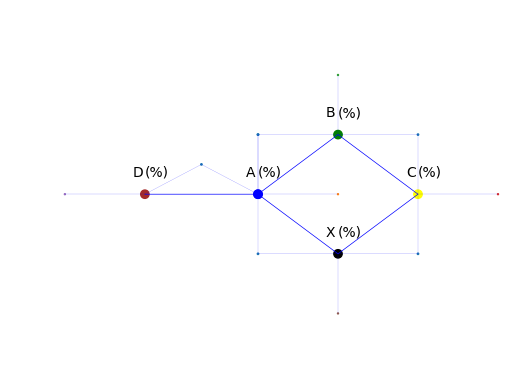

In [78]:
#Print the network with unifform sizes
list_nodes = [0,1,2,12,22]


#For specific t,step
t=43
step=60
df_t_s = df[t][step]   #need to normalize

df_t_s = np.log10(1.0 + df_t_s)

df_t_s = df_t_s/df_t_s.sum()



#########Settings
node_2_letter = {1:'A', 2:'B', 3:'C', 4:'X', 5:'D'}
node_2_color = {1:'blue', 3:'yellow', 2:'green', 4:'black', 5:'brown'}


l=1.0
point1 = [0,0] #A
point2 = [l, l]  #B
point3 = [2*l, 0]     #C
point4 = [l, -1.0*l]                    #X
point5 = [-1.0*l*math.sqrt(2),0]                 #D

#Common neighbors
point11 = [0,l]  #AB
point12 = [2*l,l] #BC
point13 = [2*l, -l] #CX
point14 = [0,-l]  #AX
point15 = [-1.0*l*math.sqrt(2)/2, l/2]

#Individual neighbors
point6 = [l,0]  #A neighs  is unnecesary
point7 = [l,2*l]   #B neighs
point8 = [3*l, 0]  #C neighs
point9 = [l, -2*l] #X neighs
point10 = [-1.0*l*math.sqrt(2)-l, 0] #D neighs


        
#This plots the common neighbours
x_values = [point11[0], point12[0], point13[0], point14[0], point11[0], point1[0], point15[0], point5[0]]
y_values = [point11[1], point12[1], point13[1], point14[1], point11[1], point1[1], point15[1], point5[1]]

sizes = 2.0*np.array([0.50 for x in range(len(y_values))])

plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these




#This plots the individual neighbours
#A->iA
x_values = [point1[0], point6[0]] 
y_values = [point1[1], point6[1]]

sizes = 2.0*np.array([0.25 for x in range(len(y_values))])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

#B->iB
x_values = [point2[0], point7[0]] 
y_values = [point2[1], point7[1]]

sizes = 2.0*np.array([0.25 for x in range(len(y_values))])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

#C->iC
x_values = [point3[0], point8[0]] 
y_values = [point3[1], point8[1]]

sizes = 2.0*np.array([0.25 for x in range(len(y_values))])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

#D->iD
x_values = [point5[0], point10[0]] 
y_values = [point5[1], point10[1]]

sizes = 2.0*np.array([0.25 for x in range(len(y_values))])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

#X->iX
x_values = [point4[0], point9[0]] 
y_values = [point4[1], point9[1]]

sizes = 2.0*np.array([0.25 for x in range(len(y_values))])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

##Text of individual nodes



#This plots the main structure
x_values = [point1[0], point2[0], point3[0], point4[0], point1[0], point5[0]]
y_values = [point1[1], point2[1], point3[1], point4[1],point1[1], point5[1]]

colors = [node_2_color[1], node_2_color[2], node_2_color[3], node_2_color[4], node_2_color[1], node_2_color[5]]
#sizes = 1000.0*np.array([sizes_dict[2],sizes_dict[0],sizes_dict[1],sizes_dict[12],sizes_dict[2],sizes_dict[22]])


plt.plot(x_values, y_values, 'o-', linewidth=0.5, color='blue', markersize=0)
plt.scatter(x_values, y_values, c=colors)

##Add node labels
x_displ = 0.15
y_displ = 0.3

for i in range(len(list(node_2_letter.keys()))):
    if i==4:
        j=1+i
        plt.text(x_values[j]-x_displ, y_values[j]+y_displ, node_2_letter[i+1])
        plt.text(x_values[j], y_values[j]+y_displ, f'(%)')
        pass
    else:
        plt.text(x_values[i]-x_displ, y_values[i]+y_displ, node_2_letter[i+1])
        plt.text(x_values[i], y_values[i]+y_displ, f'(%)')


axis_squared_lim = (-3.1, 3.1)
plt.xlim(axis_squared_lim)
plt.ylim(axis_squared_lim)        
plt.axis('off')
plt.savefig('Example_surrogate.svg', dpi=300, format='svg')

0         0.119821
1         0.121000
2         0.000801
3         0.000205
4         0.000000
            ...   
886625    0.000000
886626    0.000000
886627    0.000000
886628    0.000000
886629    0.000000
Name: 60, Length: 907624, dtype: float64


0.0

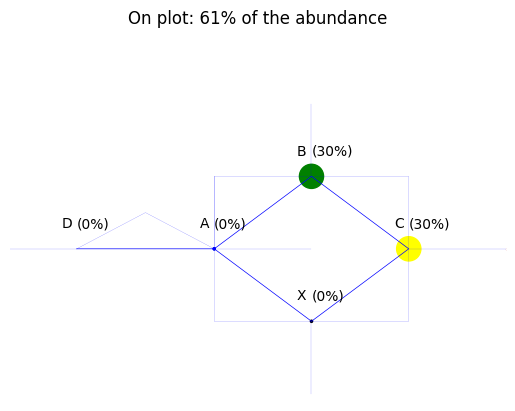

In [69]:
#Get the abundances for a desired t, step and list of points:
list_nodes = [0,1,2,12,22]


#For specific t,step
t=43
step=60
df_t_s = df[t][step]   #need to normalize

df_t_s = np.log10(1.0 + df_t_s)
print(df_t_s)

df_t_s = df_t_s/df_t_s.sum()
sizes_dict = {}
#Compute sizes for common neighbors
for e in common_AB:
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_AB = np.array(list(sizes_dict.values())).sum()

for e in common_BC:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_BC = np.array(list(sizes_dict.values())).sum()

for e in common_CX:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_CX = np.array(list(sizes_dict.values())).sum()

for e in common_AX:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_AX = np.array(list(sizes_dict.values())).sum()

for e in common_AD:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_AD = np.array(list(sizes_dict.values())).sum()

#Compute size of individual neighbors for each node
for e in indiv_A:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_iA = np.array(list(sizes_dict.values())).sum()

for e in indiv_B:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_iB = np.array(list(sizes_dict.values())).sum()

for e in indiv_C:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_iC = np.array(list(sizes_dict.values())).sum()

for e in indiv_D:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_iD = np.array(list(sizes_dict.values())).sum()

for e in indiv_X:
    sizes_dict = {}
    try:
        sizes_dict[e]= df_t_s.loc[e]
    except:
        sizes_dict[e]= 0
        
s_iX = np.array(list(sizes_dict.values())).sum()


#Compute size of self-node
sizes_dict = df_t_s.loc[list_nodes].to_dict()


#########Settings
node_2_letter = {1:'A', 2:'B', 3:'C', 4:'X', 5:'D'}
node_2_color = {1:'blue', 3:'yellow', 2:'green', 4:'black', 5:'brown'}


l=1.0
point1 = [0,0] #A
point2 = [l, l]  #B
point3 = [2*l, 0]     #C
point4 = [l, -1.0*l]                    #X
point5 = [-1.0*l*math.sqrt(2),0]                 #D

#Common neighbors
point11 = [0,l]  #AB
point12 = [2*l,l] #BC
point13 = [2*l, -l] #CX
point14 = [0,-l]  #AX
point15 = [-1.0*l*math.sqrt(2)/2, l/2]

#Individual neighbors
point6 = [l,0]  #A neighs  is unnecesary
point7 = [l,2*l]   #B neighs
point8 = [3*l, 0]  #C neighs
point9 = [l, -2*l] #X neighs
point10 = [-1.0*l*math.sqrt(2)-l, 0] #D neighs


        
#This plots the common neighbours
x_values = [point11[0], point12[0], point13[0], point14[0], point11[0], point1[0], point15[0], point5[0]]
y_values = [point11[1], point12[1], point13[1], point14[1], point11[1], point1[1], point15[1], point5[1]]

sizes = 1000.0*np.array(  [s_AB, s_BC, s_CX, s_AX, s_AB, sizes_dict[2], s_AD, sizes_dict[22]] )

plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these




#This plots the individual neighbours
#A->iA
x_values = [point1[0], point6[0]] 
y_values = [point1[1], point6[1]]

sizes = 1000.0*np.array([s_iA])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

#B->iB
x_values = [point2[0], point7[0]] 
y_values = [point2[1], point7[1]]

sizes = 1000.0*np.array([s_iB])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

#C->iC
x_values = [point3[0], point8[0]] 
y_values = [point3[1], point8[1]]

sizes = 1000.0*np.array([s_iC])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

#D->iD
x_values = [point5[0], point10[0]] 
y_values = [point5[1], point10[1]]

sizes = 1000.0*np.array([s_iD])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

#X->iX
x_values = [point4[0], point9[0]] 
y_values = [point4[1], point9[1]]

sizes = 1000.0*np.array([s_iX])
plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

##Text of individual nodes



#This plots the main structure
x_values = [point1[0], point2[0], point3[0], point4[0], point1[0], point5[0]]
y_values = [point1[1], point2[1], point3[1], point4[1],point1[1], point5[1]]

colors = [node_2_color[1], node_2_color[2], node_2_color[3], node_2_color[4], node_2_color[1], node_2_color[5]]
sizes = 1000.0*np.array([sizes_dict[2],sizes_dict[0],sizes_dict[1],sizes_dict[12],sizes_dict[2],sizes_dict[22]])


plt.plot(x_values, y_values, 'o-', linewidth=0.5, color='blue', markersize=0)
plt.scatter(x_values, y_values, sizes, colors)

##Add node labels
x_displ = 0.15
y_displ = 0.3

for i in range(len(list(node_2_letter.keys()))):
    if i==4:
        j=1+i
        plt.text(x_values[j]-x_displ, y_values[j]+y_displ, node_2_letter[i+1])
        plt.text(x_values[j], y_values[j]+y_displ, f'({int(sizes[j]/10)}%)')
        pass
    else:
        plt.text(x_values[i]-x_displ, y_values[i]+y_displ, node_2_letter[i+1])
        plt.text(x_values[i], y_values[i]+y_displ, f'({int(sizes[i]/10)}%)')


axis_squared_lim = (-2.1, 3)
plt.xlim(axis_squared_lim)
plt.ylim(axis_squared_lim)        
tot_ab = np.array(list(sizes_dict.values())).sum() + 1.0*(  
            s_AB+s_BC+s_CX+s_AX+s_AD  + s_iA + s_iB+s_iC+s_iX+s_iD)
plt.title(f'On plot: {int(tot_ab*100)}% of the abundance')
plt.axis('off')
#plt.savefig(f'/home/samuel/Documents/PhD/Quasispecies/
#                Quasispecies_evolution/01-overlapping_vector/
#                pics_results/surrogate_network_svg/{a}.svg', dpi=300, format='svg')


s_iB*100


/tmp/ipykernel_16478/3777500201.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


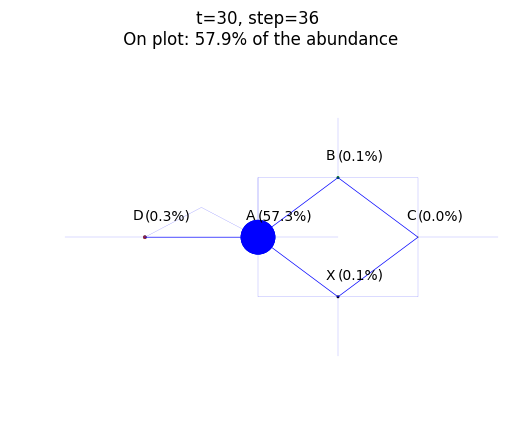

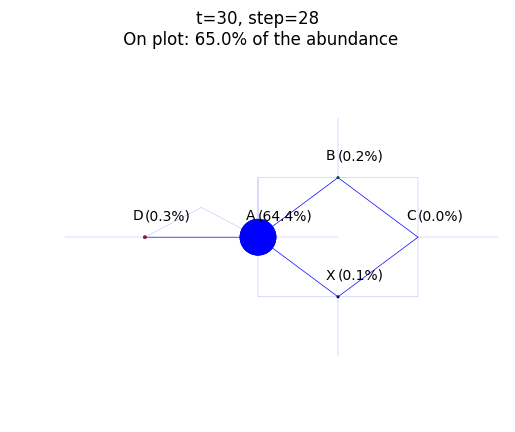

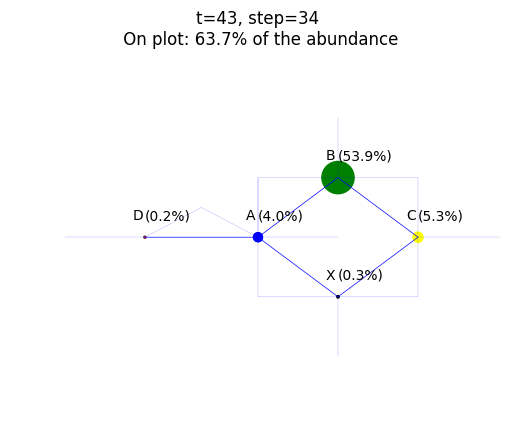

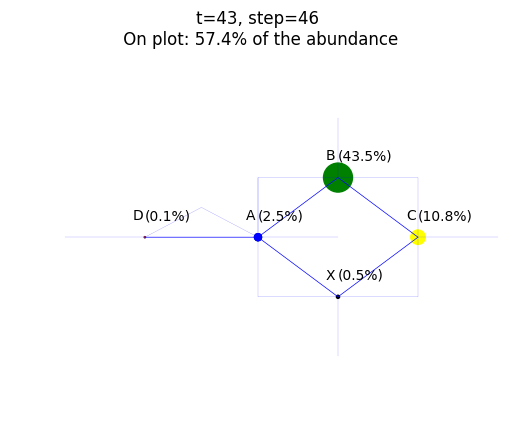

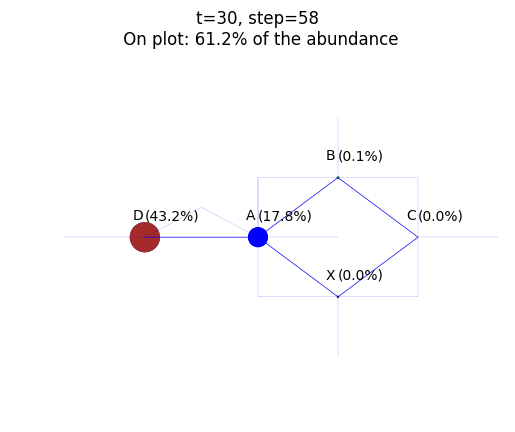

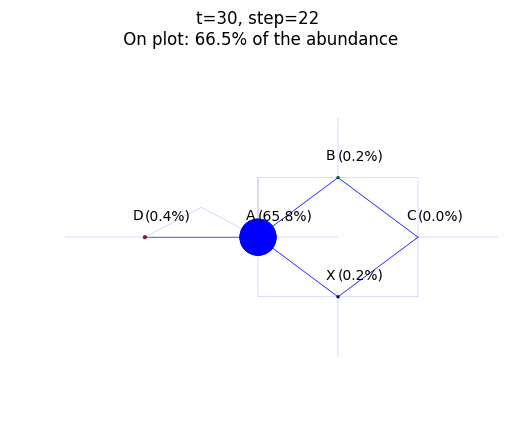

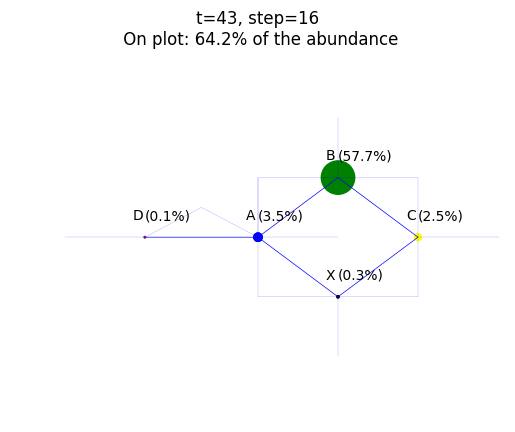

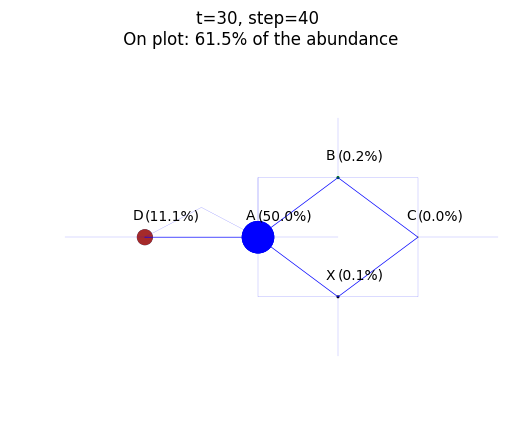

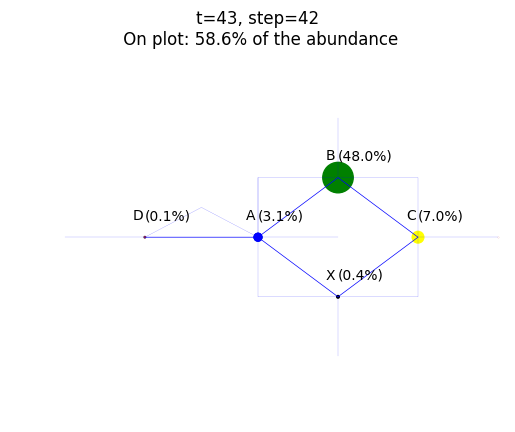

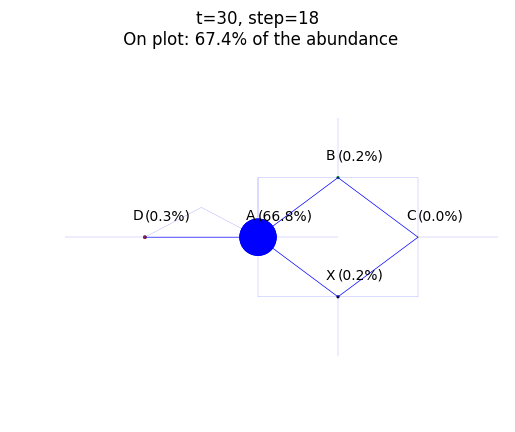

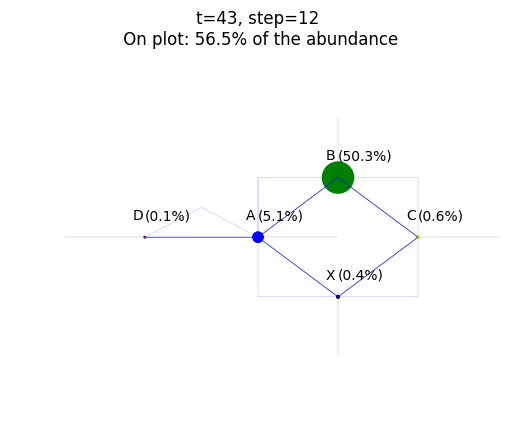

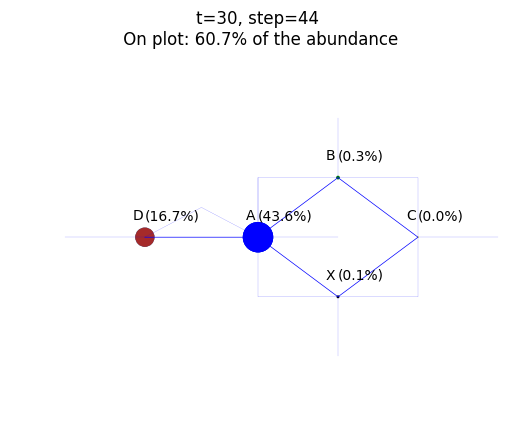

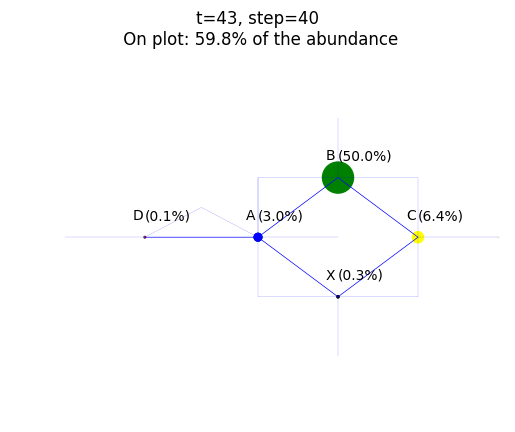

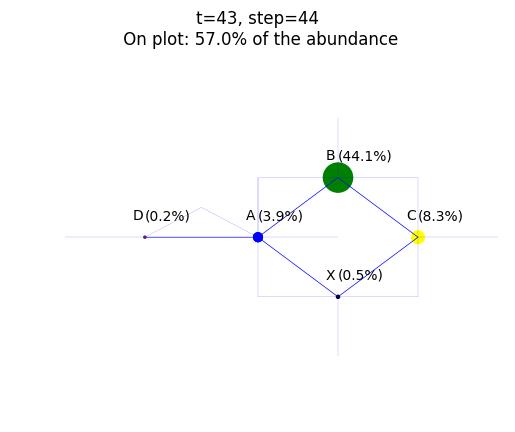

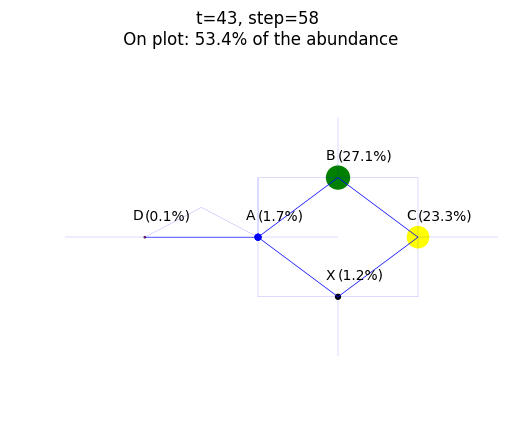

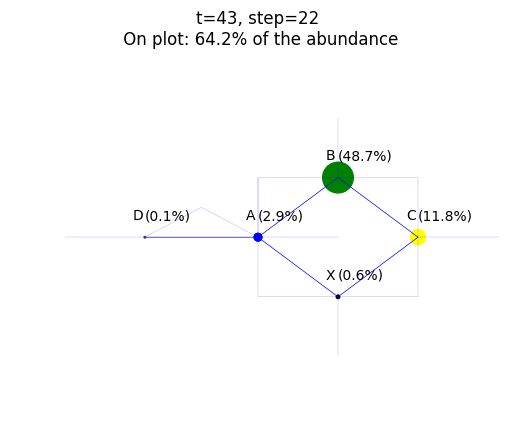

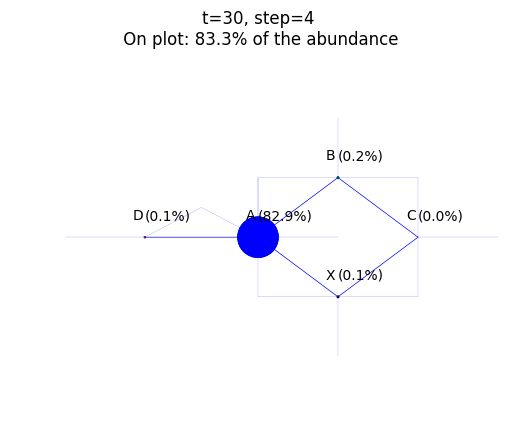

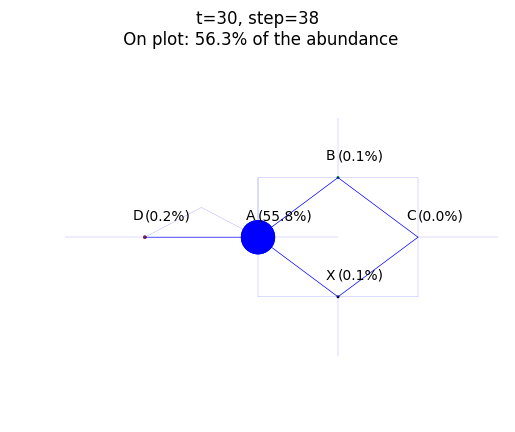

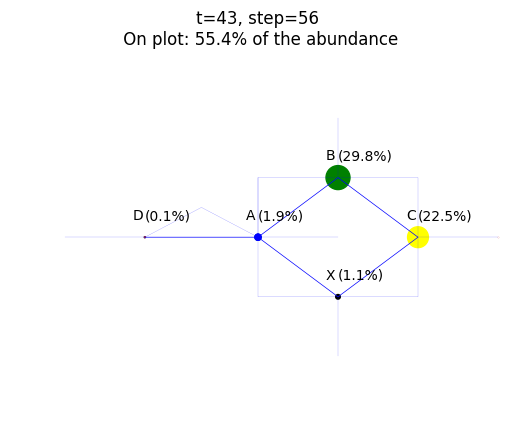

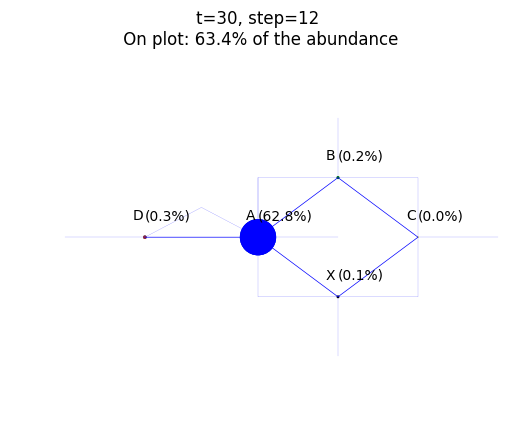

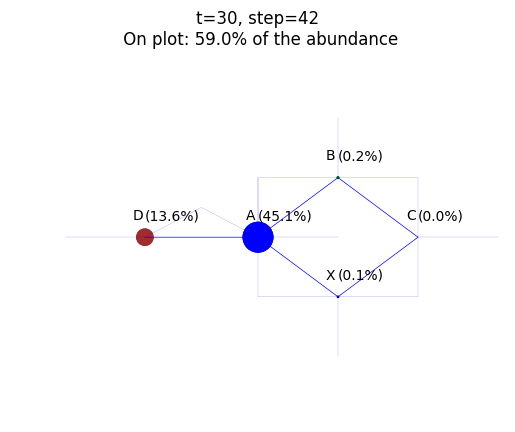

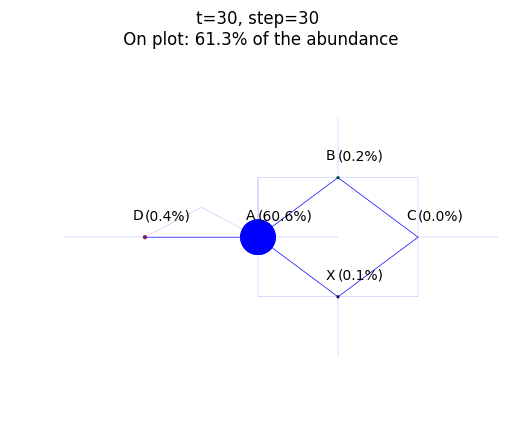

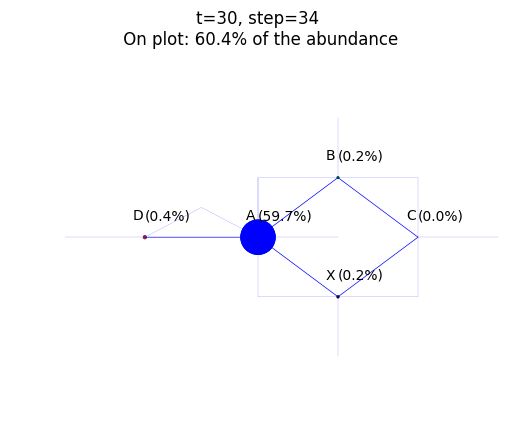

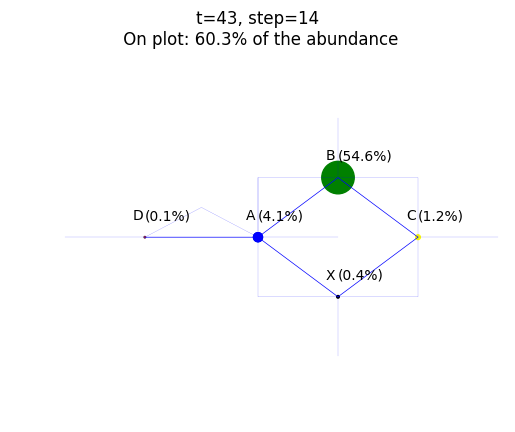

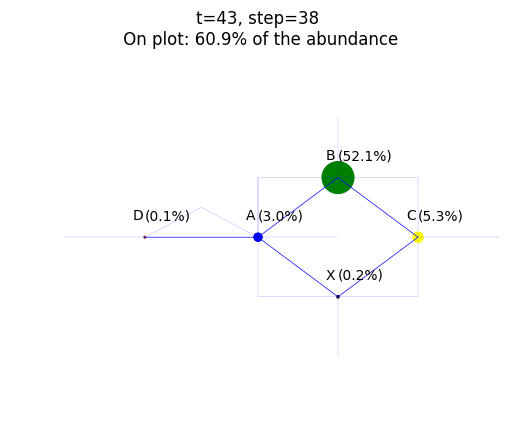

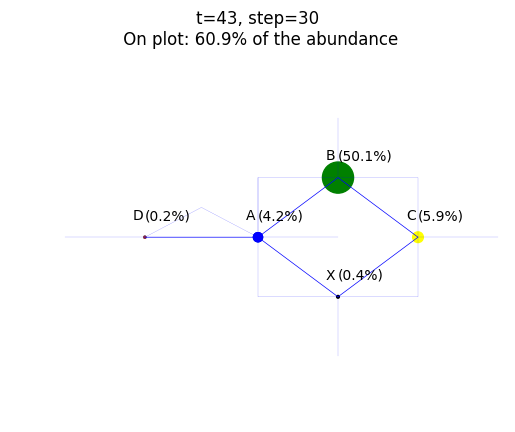

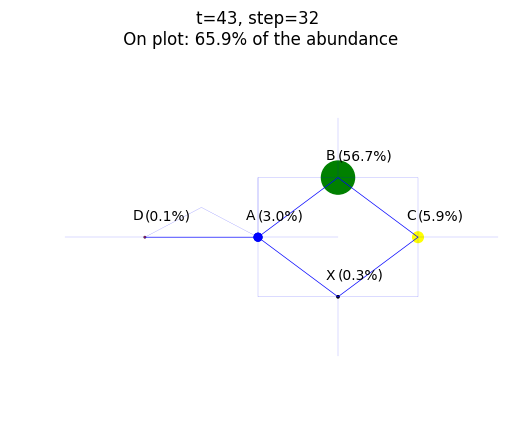

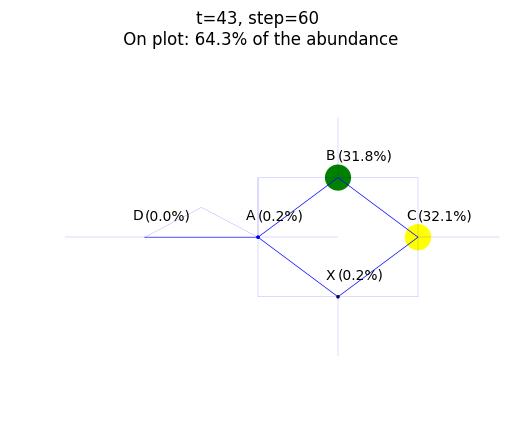

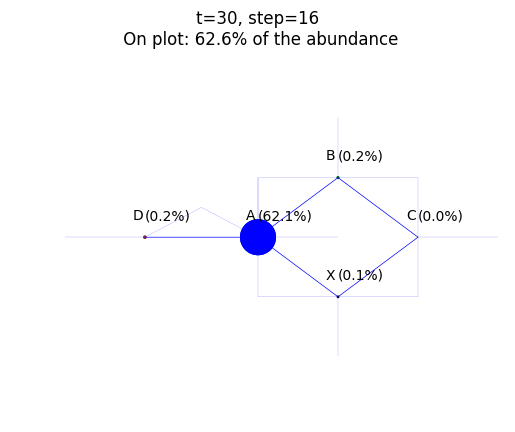

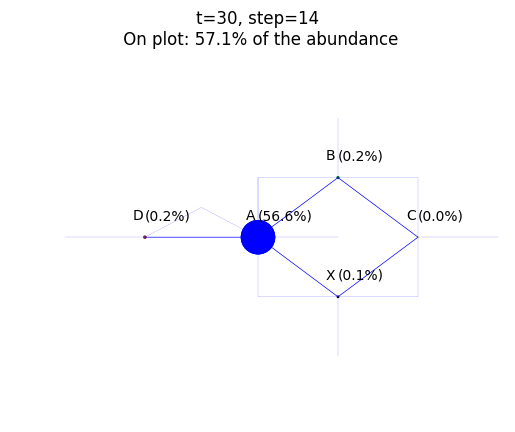

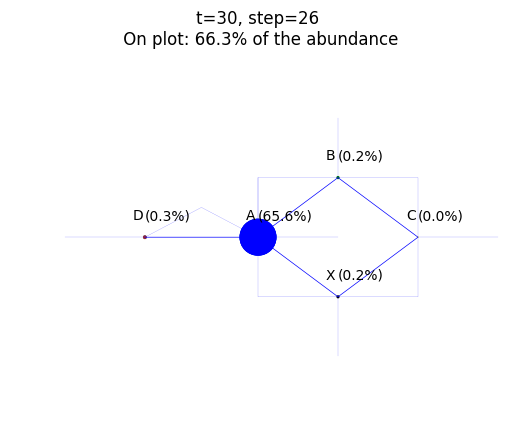

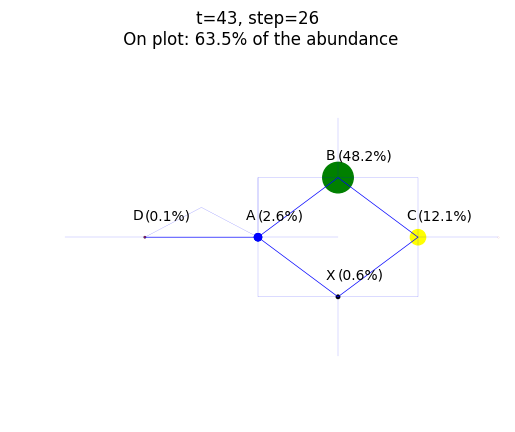

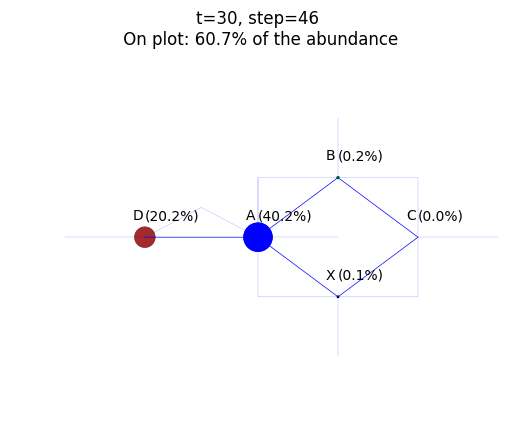

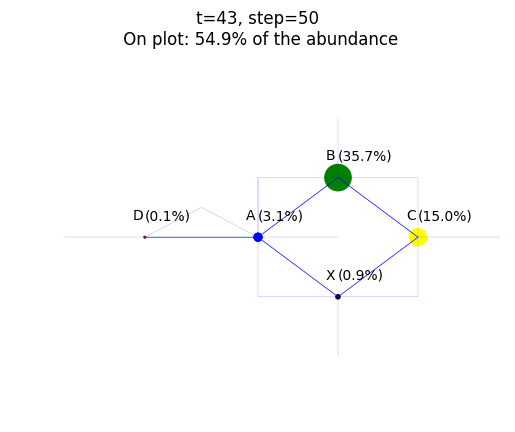

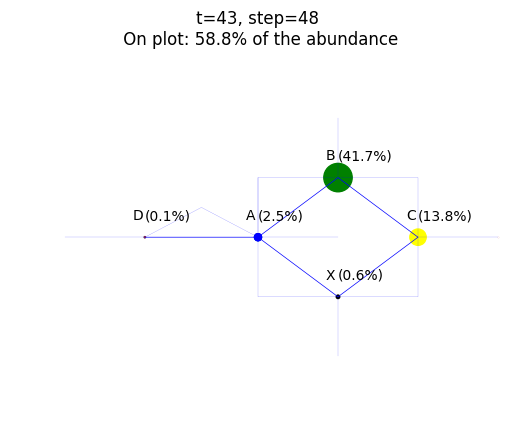

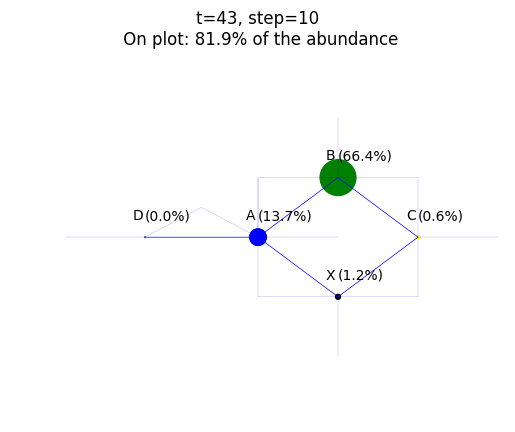

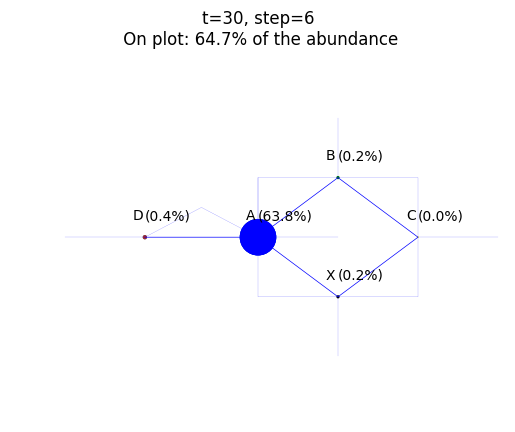

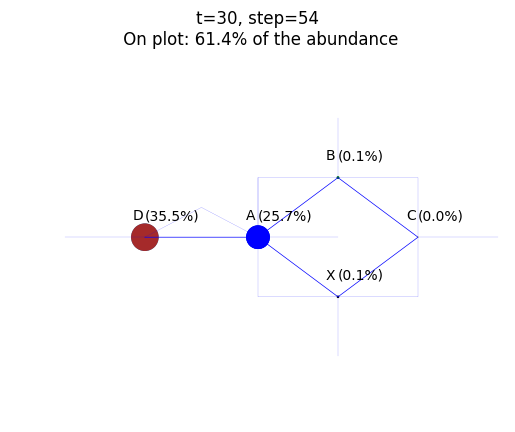

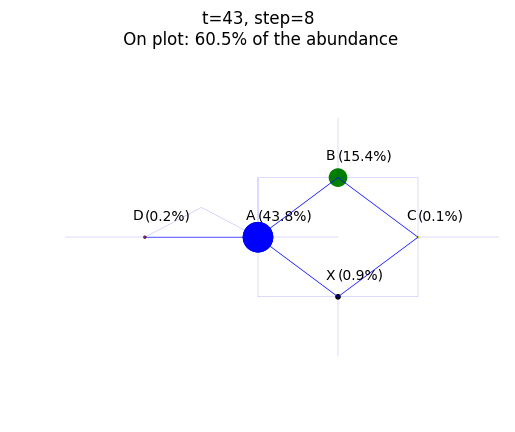

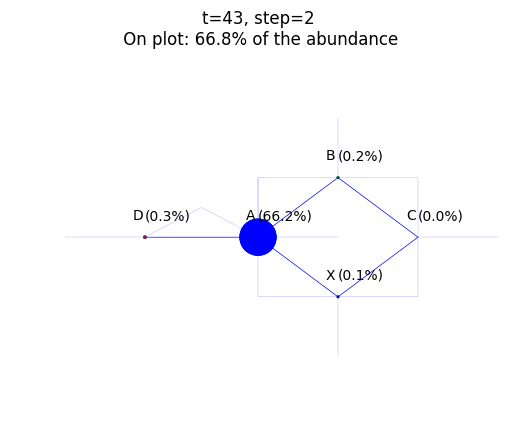

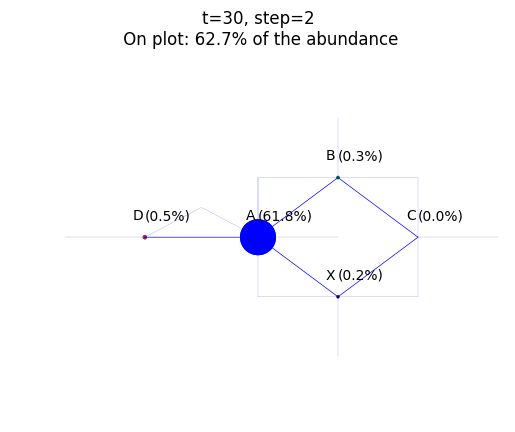

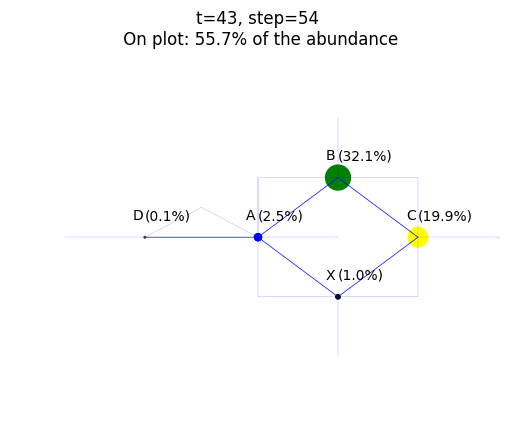

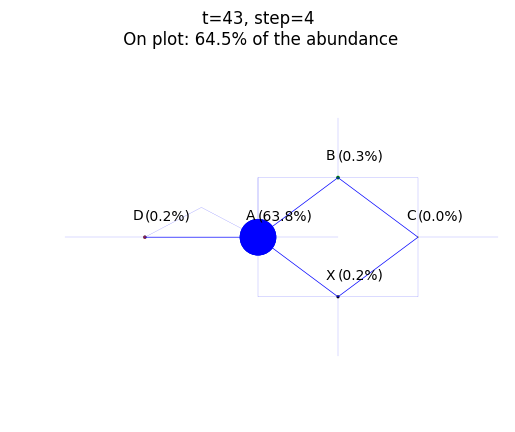

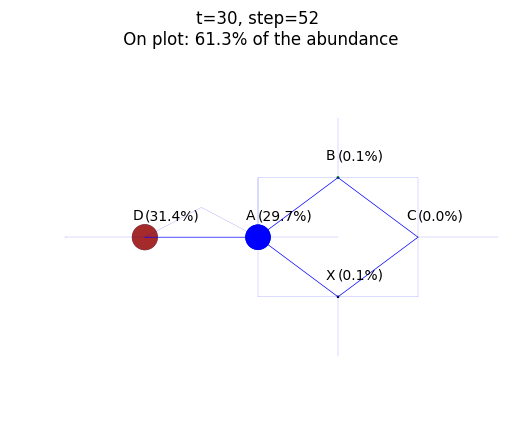

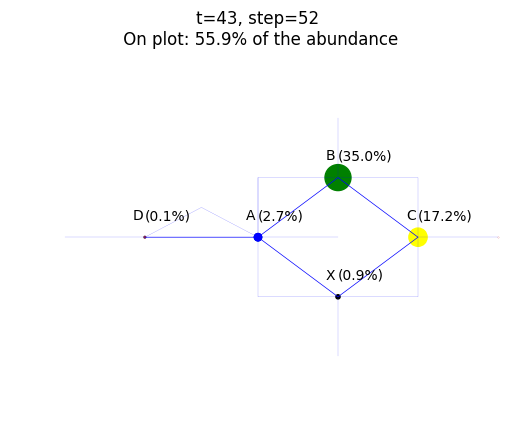

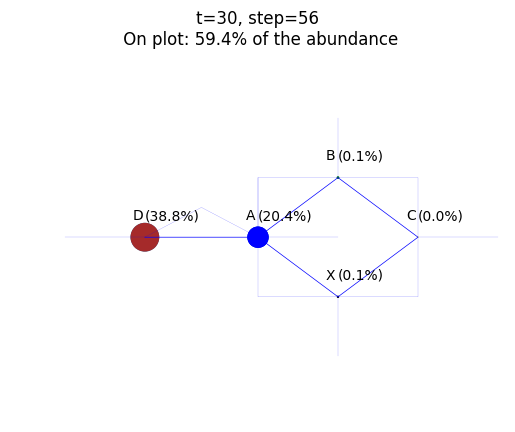

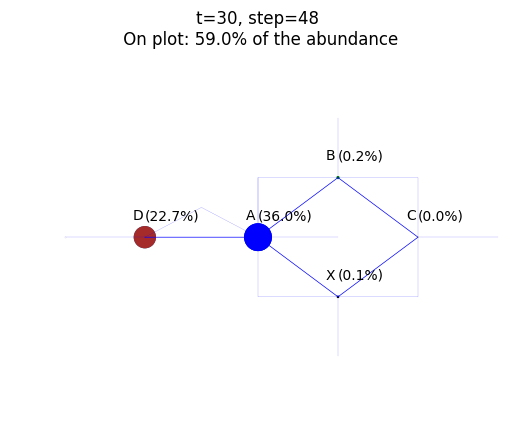

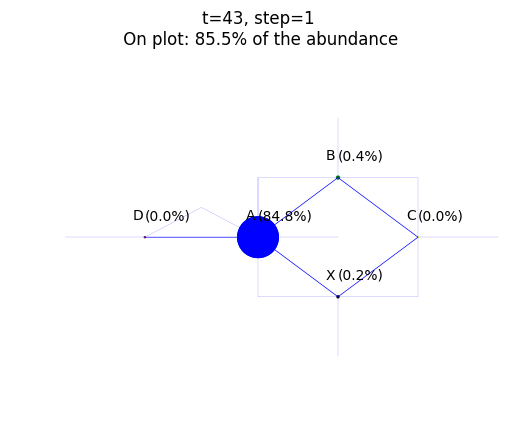

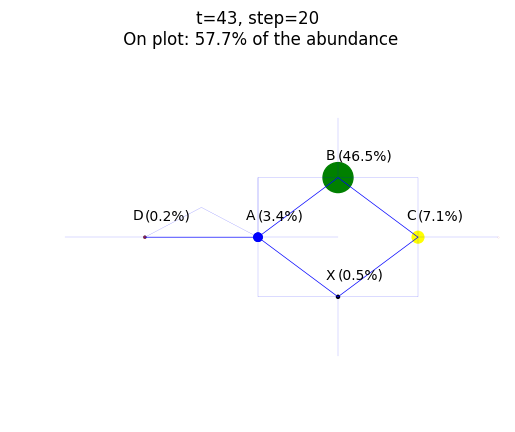

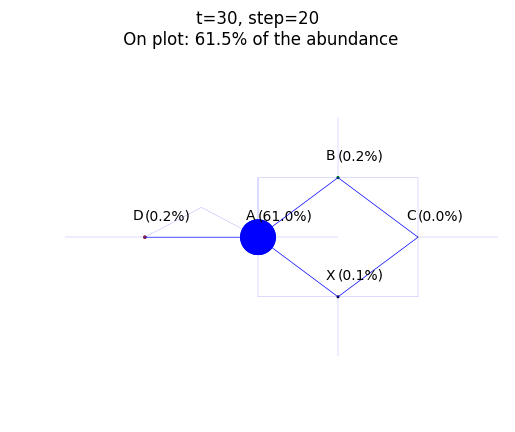

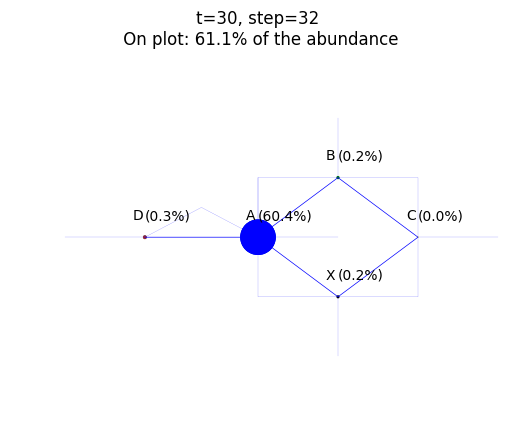

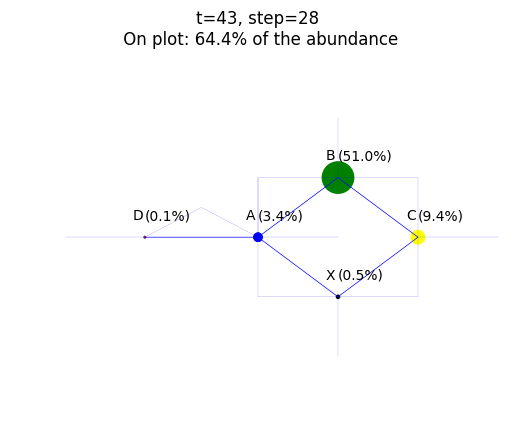

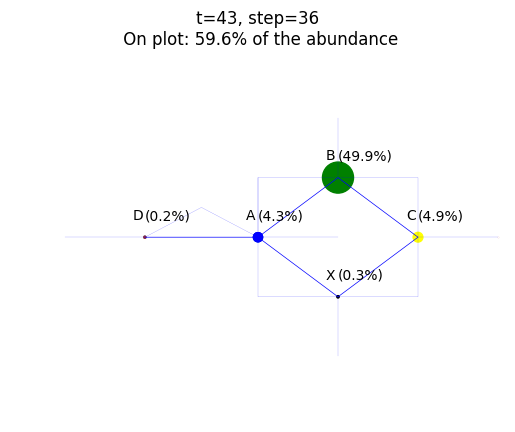

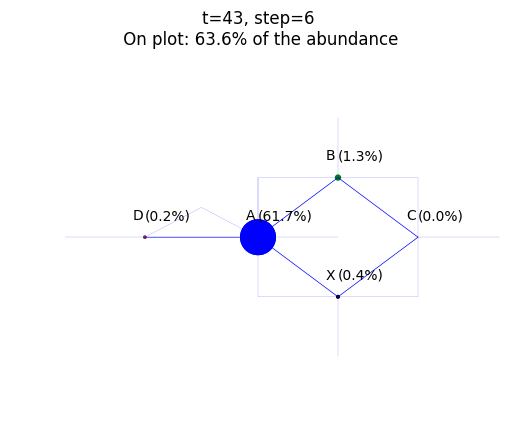

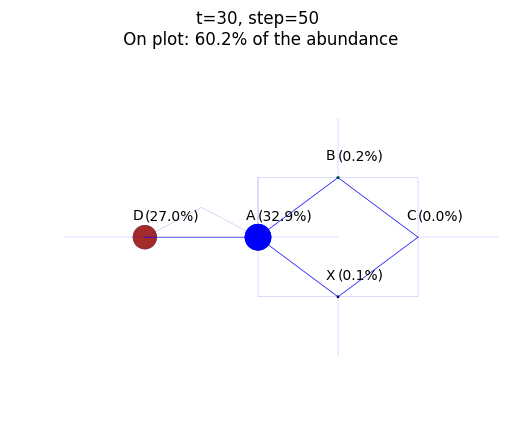

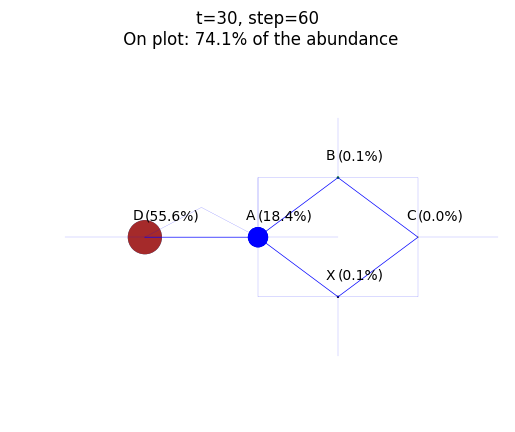

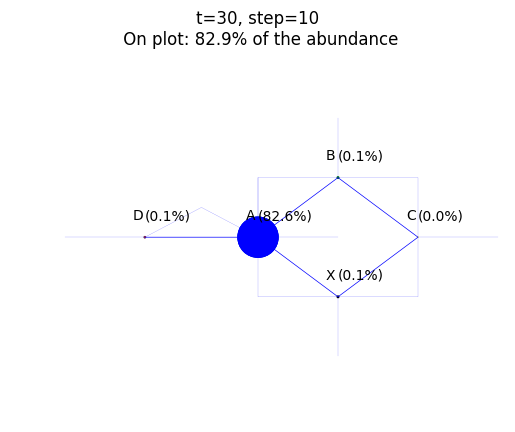

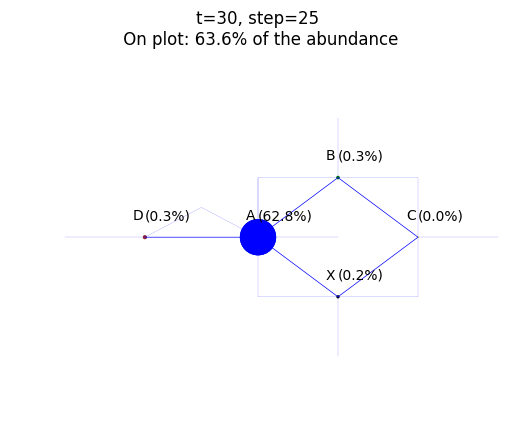

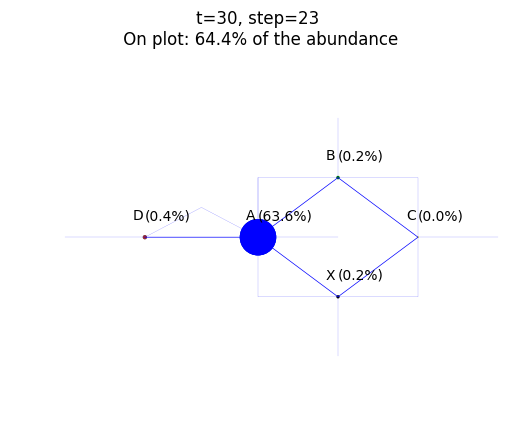

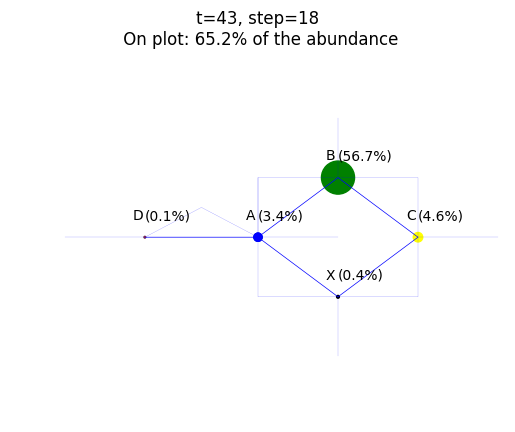

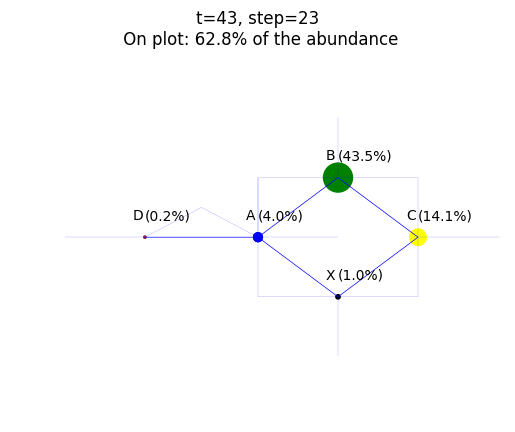

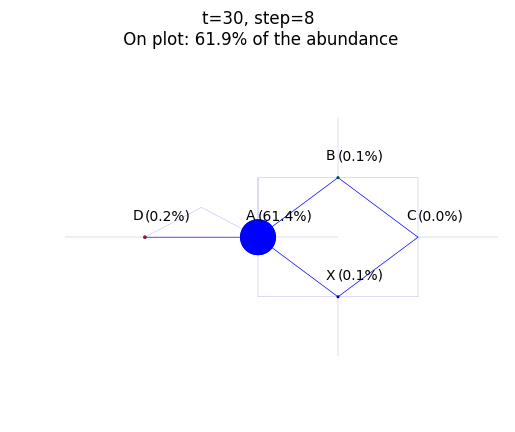

In [66]:
#read each file
def analyze_fname(a):
    '''
    Function that looks in file_name the values of
    temperature and step
    
    Returns:  
        - temperature (Celsius degrees)
        - step
    '''
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
    return t, step

for a in onlyfiles:
    plt.figure()
    t,step = analyze_fname(a)
    
    df_t_s = df[t][step]   #need to normalize
    df_t_s = df_t_s/df_t_s.sum()

    #Compute sizes for common neighbors
    sizes_dict = {}
    for e in common_AB:
        
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_AB = np.array(list(sizes_dict.values())).sum()

    for e in common_BC:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_BC = np.array(list(sizes_dict.values())).sum()

    for e in common_CX:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_CX = np.array(list(sizes_dict.values())).sum()

    for e in common_AX:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_AX = np.array(list(sizes_dict.values())).sum()

    for e in common_AD:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_AD = np.array(list(sizes_dict.values())).sum()

    #Compute size of individual neighbors for each node
    for e in indiv_A:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_iA = np.array(list(sizes_dict.values())).sum()

    for e in indiv_B:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_iB = np.array(list(sizes_dict.values())).sum()

    for e in indiv_C:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_iC = np.array(list(sizes_dict.values())).sum()

    for e in indiv_D:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_iD = np.array(list(sizes_dict.values())).sum()

    for e in indiv_X:
        sizes_dict = {}
        try:
            sizes_dict[e]= df_t_s.loc[e]
        except:
            sizes_dict[e]= 0

    s_iX = np.array(list(sizes_dict.values())).sum()


    #Compute size of self-node
    sizes_dict = df_t_s.loc[list_nodes].to_dict()


    #########Settings
    node_2_letter = {1:'A', 2:'B', 3:'C', 4:'X', 5:'D'}
    node_2_color = {1:'blue', 3:'yellow', 2:'green', 4:'black', 5:'brown'}


    l=1.0
    point1 = [0,0] #A
    point2 = [l, l]  #B
    point3 = [2*l, 0]     #C
    point4 = [l, -1.0*l]                    #X
    point5 = [-1.0*l*math.sqrt(2),0]                 #D

    #Common neighbors
    point11 = [0,l]  #AB
    point12 = [2*l,l] #BC
    point13 = [2*l, -l] #CX
    point14 = [0,-l]  #AX
    point15 = [-1.0*l*math.sqrt(2)/2, l/2]

    #Individual neighbors
    point6 = [l,0]  #A neighs  is unnecesary
    point7 = [l,2*l]   #B neighs
    point8 = [3*l, 0]  #C neighs
    point9 = [l, -2*l] #X neighs
    point10 = [-1.0*l*math.sqrt(2)-l, 0] #D neighs



    #This plots the common neighbours
    x_values = [point11[0], point12[0], point13[0], point14[0], point11[0], point1[0], point15[0], point5[0]]
    y_values = [point11[1], point12[1], point13[1], point14[1], point11[1], point1[1], point15[1], point5[1]]

    sizes = 1000.0*np.array(  [s_AB, s_BC, s_CX, s_AX, s_AB, sizes_dict[2], s_AD, sizes_dict[22]] )

    plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
    plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these




    #This plots the individual neighbours
    #A->iA
    x_values = [point1[0], point6[0]] 
    y_values = [point1[1], point6[1]]

    sizes = 1000.0*np.array([s_iA])
    plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
    plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

    #B->iB
    x_values = [point2[0], point7[0]] 
    y_values = [point2[1], point7[1]]

    sizes = 1000.0*np.array([s_iB])
    plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
    plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

    #C->iC
    x_values = [point3[0], point8[0]] 
    y_values = [point3[1], point8[1]]

    sizes = 1000.0*np.array([s_iC])
    plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
    plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

    #D->iD
    x_values = [point5[0], point10[0]] 
    y_values = [point5[1], point10[1]]

    sizes = 1000.0*np.array([s_iD])
    plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
    plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these

    #X->iX
    x_values = [point4[0], point9[0]] 
    y_values = [point4[1], point9[1]]

    sizes = 1000.0*np.array([s_iX])
    plt.plot(x_values, y_values, '-', linewidth=0.1, color='blue', markersize=0)
    plt.scatter(x_values, y_values, sizes)   #Need to solve sizes for these



    #This plots the main structure
    x_values = [point1[0], point2[0], point3[0], point4[0], point1[0], point5[0]]
    y_values = [point1[1], point2[1], point3[1], point4[1],point1[1], point5[1]]

    colors = [node_2_color[1], node_2_color[2], node_2_color[3], node_2_color[4], node_2_color[1], node_2_color[5]]
    sizes = 1000.0*np.array([sizes_dict[2],sizes_dict[0],sizes_dict[1],sizes_dict[12],sizes_dict[2],sizes_dict[22]])


    plt.plot(x_values, y_values, 'o-', linewidth=0.5, color='blue', markersize=0)
    plt.scatter(x_values, y_values, sizes, colors)

    ##Add node labels
    x_displ = 0.15
    y_displ = 0.3

    for i in range(len(list(node_2_letter.keys()))):
        if i==4:
            j=1+i
            plt.text(x_values[j]-x_displ, y_values[j]+y_displ, node_2_letter[i+1])
            plt.text(x_values[j], y_values[j]+y_displ, f'({round(sizes[j]/10,1)}%)')
            pass
        else:
            plt.text(x_values[i]-x_displ, y_values[i]+y_displ, node_2_letter[i+1])
            plt.text(x_values[i], y_values[i]+y_displ, f'({round(sizes[i]/10,1)}%)')


    axis_squared_lim = (-3.1, 3.1)
    plt.xlim(axis_squared_lim)
    plt.ylim(axis_squared_lim)        
    tot_ab = np.array(list(sizes_dict.values())).sum() + 1.0*(  
                s_AB+s_BC+s_CX+s_AX+s_AD  + s_iA + s_iB+s_iC+s_iX+s_iD)
    plt.title(f't={t}, step={step}\n On plot: {round(tot_ab*100,1)}% of the abundance')
    plt.axis('off')
    plt.savefig(f'/home/samuel/Documents/PhD/Quasispecies/Quasispecies_evolution/01-overlapping_vector/pics_results/surrogate_network_svg/{a}.svg', dpi=300, format='svg')


In [ ]:
#DO NOT EXECUTE THIS. WAS JUST NECESSARY THE FIRST TIME AND IT'S SAVED AS A PKL ARCHIVE.

In [ ]:
#info is in file extra.txt